# Demo to run ECmean4 functions within the AQUA framework

We load the AQUA module

In [1]:
import sys
# sys.path.clear()
sys.path.append("~/AQUA")
# sys.path.insert(0, "/users/sughosh/AQUA")
from aqua import Reader
import xarray as xr

2023-11-29 15:17:21 :: eccodes :: WARNING  -> ShortName tprate have multiple grib codes associated: ['260048', '172228']
2023-11-29 15:17:21 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right
2023-11-29 15:17:21 :: Reader :: WARNING  -> No fixes available for model NEMO


Start loading the ecmean functions, define the years of the experiments and experiment name. We define both atmospheric and oceanic models, as well initial and final years and the name of the configuration file. 

In [6]:
data

<xarray.Dataset>
Dimensions:  (time: 360, height: 1, lat: 180, lon: 360, plev: 19, depth: 1)
Coordinates:
  * time     (time) datetime64[ns] 1990-02-01 1990-03-01 ... 2020-01-01
  * height   (height) float64 2.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * depth    (depth) float64 0.0
Data variables:
    2t       (time, height, lat, lon) float32 dask.array<chunksize=(360, 1, 180, 360), meta=np.ndarray>
    msl      (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    mtpf     (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float32 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float32 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float32 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float32 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    avg_sos  (time, depth, lat, lon) float32 dask.array<chunksize=(360, 1, 180, 360), meta=np.ndarray>
    avg_tos  (time, depth, lat, lon) float32 dask.array<chunksize=(360, 1, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Tue Nov 28 13:13:00 2023: cdo -remapbil,r360x180 fc9_228004...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

Call the reader for the atmospheric and oceanic components. Currently separated to avoid conflicts between variables with same name. For safety, we remove sea ice from atmospheric dataset.

In [18]:
clim_data=xr.open_mfdataset("/pfs/lustrep3/scratch/project_465000454/kkeller/AQUA/diagnostics/ecmean/ECmean4/ecmean/climatology/EC23/r360x180/*")
clim= clim_data.isel(time=0).squeeze().ta


In [48]:

# reader_atm2d = Reader(model="IFS", exp="tco79-eORCA2", source="atm2d", areas=False)
# data_atm2d = reader_atm2d.retrieve(fix=True)
# reader_atm3d = Reader(model="IFS", exp="tco79-eORCA2", source="atm3d", areas=False)
# data_atm3d = reader_atm3d.retrieve(fix=True)
# data_path= "/scratch/project_465000454/tmp/a09x/"
data_path= "/scratch/project_465000454/sughosh/replicability_data/"
data_atm2d = xr.open_mfdataset(data_path+"/atm_2d.nc")
data_atm3d = xr.open_mfdataset(data_path+"/atm_3d.nc")
data_ocean3d = xr.open_mfdataset(data_path+"/ocean_2d.nc")
data = data_atm3d.merge(data_atm2d)
data = data.merge(data_ocean3d)

# data= data.rename({"2t_mean":"2t"})
data = data.rename({"height":"plev"})
data= data.rename({"avg_siconc":"ci"})
data= data.rename({"avg_tos":"sst"})
data= data.rename({"avg_sos":"sos"})

# data = xr.open_mfdataset(data_path+"/*nc")

data["2t"].attrs["units"]=data["2t"].attrs["GRIB_units"]
data["msl"].attrs["units"]=data["msl"].attrs["GRIB_units"]
data["tprate"].attrs["units"]=data["tprate"].attrs["GRIB_units"]
data["t"].attrs["units"]=data["t"].attrs["GRIB_units"]
data["u"].attrs["units"]=data["u"].attrs["GRIB_units"]
data["v"].attrs["units"]=data["v"].attrs["GRIB_units"]
data["q"].attrs["units"]=data["q"].attrs["GRIB_units"]
data["ci"].attrs["units"]=data["ci"].attrs["GRIB_units"]
data["sst"].attrs["units"]=data["sst"].attrs["GRIB_units"]
data["sos"].attrs["units"]=data["sos"].attrs["GRIB_units"]

# data= data.rename({"height":"plev"})
data = data.interp_like(clim)
data

<xarray.Dataset>
Dimensions:  (time: 360, lon: 360, plev: 19, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 1990-02-01 1990-03-01 ... 2020-01-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    msl      (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    2t       (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    sos      (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    sst      (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>

# Performance indices
Basic call to performance indices

In [17]:
from aqua import Reader
reader = Reader(model='IFS', exp='a0er-LUMI-C', source='fc9-lra-r100-monthly',fix=True)
data_atmos = reader.retrieve()
reader = Reader(model='NEMO', exp='a0er-LUMI-C', source='fc9-lra-r100-monthly',fix=True)
data_ocean = reader.retrieve()
data = data_atmos.merge(data_ocean)
# data = data.rename({"avg_sos":"sos"})
data = data.rename({"avg_tos":"sst"})
data

2023-11-29 15:27:07 :: eccodes :: WARNING  -> ShortName tprate have multiple grib codes associated: ['260048', '172228']
2023-11-29 15:27:07 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right
2023-11-29 15:27:07 :: Reader :: WARNING  -> No fixes available for model NEMO


<xarray.Dataset>
Dimensions:  (time: 360, height: 1, lat: 180, lon: 360, plev: 19, depth: 1)
Coordinates:
  * time     (time) datetime64[ns] 1990-02-01 1990-03-01 ... 2020-01-01
  * height   (height) float64 2.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * depth    (depth) float64 0.0
Data variables:
    2t       (time, height, lat, lon) float32 dask.array<chunksize=(360, 1, 180, 360), meta=np.ndarray>
    msl      (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    mtpf     (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float32 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    t        (time, plev, lat, lon) float32 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float32 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float32 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    avg_sos  (time, depth, lat, lon) float32 dask.array<chunksize=(360, 1, 180, 360), meta=np.ndarray>
    sst      (time, depth, lat, lon) float32 dask.array<chunksize=(360, 1, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Tue Nov 28 13:13:00 2023: cdo -remapbil,r360x180 fc9_228004...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [18]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
# from wand.image import Image as WImage # to open PDFs in jupyter
import sys

model_atm = 'IFS'
model_oce = 'FESOM'
exp = 'tco79-orca1'
year1 = 1990
year2 = 2020
numproc = 10
interface = '../config/interface_AQUA_lumi.yml'
config = '../config/ecmean_config_replicability.yml'

performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

# img = WImage(filename=f'/pfs/lustrep3/scratch/project_465000454/AQUA-workflow/ecmean/figures/PI4_EC23_{exp}_AQUA_r1i1p1f1_{year1}_{year2}.pdf')
# img

2023-11-29 15:27:15 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...


Welcome to ECmean4 v0.1.6: Running performance_indices!


2023-11-29 15:27:20 | ecmean |  WARNING -> Preproc in 4.2337 seconds
2023-11-29 15:27:20 | ecmean.libs.files |  WARNING -> Variable pr requires tprate which is not available in the model output. Ignoring it.
2023-11-29 15:27:20 | ecmean.libs.files |  WARNING -> Variable sos requires sos which is not available in the model output. Ignoring it.


PI for Global ALL psl 4.255
PI for Global ALL tas 24.995
PI for Global ALL tos 6.663
PI for Global DJF psl PI for1.946
 Global ALL siconc 1.486
PI for Global DJF tas 14.379
PI for Global JJA psl 3.742
PI for Global DJF tos 7.053
PI for Global JJA tas 27.837
PI for Global DJF siconc 6.271
PI for Global JJA tos 10.904
PI for Global JJA siconc 5.715
PI for Global ALL ta 368.358
PI for Global ALL ua 15.225
PI for Global ALL hus 161.473
PI for Global ALL va 8.163
PI for Global DJF ta 276.716
PI for Global DJF ua 4.877
PI for Global DJF hus 114.098
PI for Global DJF va 4.725
PI for Global JJA ta 267.266
PI for Global JJA ua 10.028
PI for Global JJA hus 101.6
PI for Global JJA va 6.439


2023-11-29 15:27:27 | ecmean |  WARNING -> Done in 7.5667 seconds with 10 processors
2023-11-29 15:27:29 | ecmean |  WARNING -> Postproc done in 1.5492 seconds


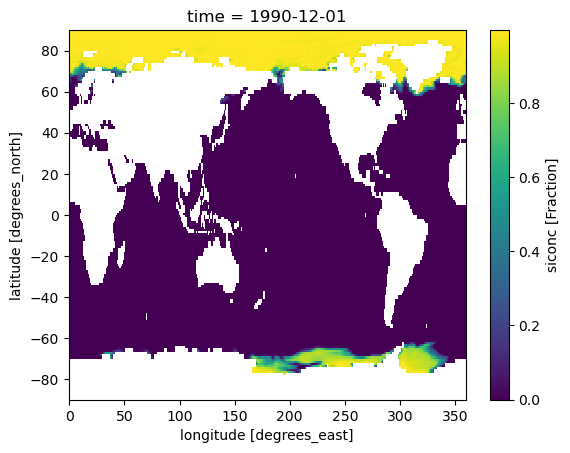

In [39]:
data.siconc[10].plot()

2023-09-05 14:06:52 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...


Welcome to ECmean4 v0.1.4: Running global_mean!


2023-09-05 14:06:52 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!
2023-09-05 14:06:52 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-09-05 14:06:52 | ecmean.libs.support |  WARNING -> No mask available for oceanic vars, this might lead to inconsistent results...


Average: psl ALL Global 1011.7518679110265
Average: tas ALL Global 12.52637008796512
Average: pr ALL Global 2.6535466505264087


2023-09-05 14:06:56 | ecmean |  WARNING -> Analysis done in 3.7164 seconds
2023-09-05 14:06:57 | ecmean |  WARNING -> Postproc done in 1.2406 seconds


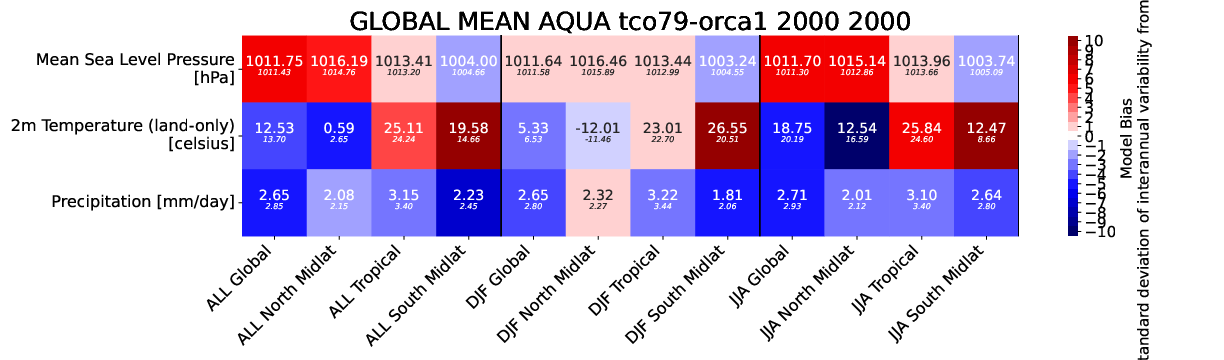

In [23]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)
img = WImage(filename=f'/pfs/lustrep3/scratch/project_465000454/AQUA-workflow/ecmean/figures/global_mean_{exp}_AQUA_r1i1p1f1_{year1}_{year2}.pdf')
img